# Fundamentos de Apache Spark: SQL/DataFrames

**Spark SQLtrabaja con DataFrames**. Un DataFrame es una **representación relacional de los datos**. Proporciona funciones con capacidades similares a SQL. Además, permite escribir **consultas tipo SQL** para nuestro análisis de datos.

Los DataFrames son similares a las tablas relacionales o DataFrames en Python / R auqnue con muchas optimizaciones que se ejecutan de manera "oculta" para el usuario. Hay varias formas de crear DataFrames a partir de colecciones, tablas HIVE, tablas relacionales y RDD.

In [3]:
import findspark
findspark.init()

import pandas as pd
import pyspark

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

### Crear la sesión de Spark 

In [5]:
spark = SparkSession.builder.getOrCreate()

24/04/11 15:07:26 WARN Utils: Your hostname, Nelsons-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.20.25 instead (on interface en0)
24/04/11 15:07:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/11 15:07:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 61641)
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.1_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/socketserver.py", line 318, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/opt/homebrew/Cellar/python@3.12/3.12.1_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/socketserver.py", line 349, in process_request
    self.finish_request(request, client_address)
  File "/opt/homebrew/Cellar/python@3.12/3.12.1_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/socketserver.py", line 362, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/opt/homebrew/Cellar/python@3.12/3.12.1_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/socketserver.py", line 761, in __init__
    self.handle()
  File "/Users/nelson/Repositories/Udemy/data-engineer/da

### Crear el DataFrame

In [6]:
emp = [(1, "AAA", "dept1", 1000),
    (2, "BBB", "dept1", 1100),
    (3, "CCC", "dept1", 3000),
    (4, "DDD", "dept1", 1500),
    (5, "EEE", "dept2", 8000),
    (6, "FFF", "dept2", 7200),
    (7, "GGG", "dept3", 7100),
    (8, "HHH", "dept3", 3700),
    (9, "III", "dept3", 4500),
    (10, "JJJ", "dept5", 3400)]

dept = [("dept1", "Department - 1"),
        ("dept2", "Department - 2"),
        ("dept3", "Department - 3"),
        ("dept4", "Department - 4")

       ]

df = spark.createDataFrame(emp, ["id", "name", "dept", "salary"])

deptdf = spark.createDataFrame(dept, ["id", "name"]) 

In [9]:
df.show()

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
|  2| BBB|dept1|  1100|
|  3| CCC|dept1|  3000|
|  4| DDD|dept1|  1500|
|  5| EEE|dept2|  8000|
|  6| FFF|dept2|  7200|
|  7| GGG|dept3|  7100|
|  8| HHH|dept3|  3700|
|  9| III|dept3|  4500|
| 10| JJJ|dept5|  3400|
+---+----+-----+------+



In [8]:
#Crear un df a partir de una tabla de Hive
df = spark.table("tbl_name")

AnalysisException: [TABLE_OR_VIEW_NOT_FOUND] The table or view `tbl_name` cannot be found. Verify the spelling and correctness of the schema and catalog.
If you did not qualify the name with a schema, verify the current_schema() output, or qualify the name with the correct schema and catalog.
To tolerate the error on drop use DROP VIEW IF EXISTS or DROP TABLE IF EXISTS.;
'UnresolvedRelation [tbl_name], [], false


# Operaciones básicas en DataFrames

### count
* Cuenta el número de filas

In [ ]:
df.count()

### columns

In [ ]:
df.columns

### dtypes
** Accede al DataType de columnas dentro del DataFrame

In [ ]:
df.dtypes

### schema
** Comprueba cómo Spark almacena el esquema del DataFrame

In [ ]:
df.schema

### printSchema

In [ ]:
df.printSchema()

### select
* Seleccione columnas del DataFrame

In [ ]:
df.select("id", "name").show()

### filter

* Filtrar las filas según alguna condición.
* Intentemos encontrar las filas con id = 1.
* Hay diferentes formas de especificar la condición.

In [ ]:
df.filter(df["id"] == 1).show()
df.filter(df.id == 1).show()

In [ ]:
df.filter(col("id") == 1).show()
df.filter("id = 1").show()

### drop
* Elimina una columna en particular

newdf = df.drop("id")
newdf.show(2)

### Aggregations
* Podemos usar la función groupBy para agrupar los datos y luego usar la función "agg" para realizar la agregación de datos agrupados.

In [ ]:
(df.groupBy("dept")
    .agg(
        count("salary").alias("count"),
        sum("salary").alias("sum"),
        max("salary").alias("max"),
        min("salary").alias("min"),
        avg("salary").alias("avg")
        ).show()
)

### Sorting

* Ordena los datos según el "salario". De forma predeterminada, la clasificación se realizará en orden ascendente.

In [ ]:
df.sort("salary").show(5)

In [ ]:
# Sort the data in descending order.
df.sort(desc("salary")).show(5)

### Columnas derivadas
* Podemos usar la función "withColumn" para derivar la columna en función de las columnas existentes ...

In [ ]:
df.withColumn("bonus", col("salary") * .1).show()

### Joins

* Podemos realizar varios tipos de combinaciones en múltiples DataFrames.

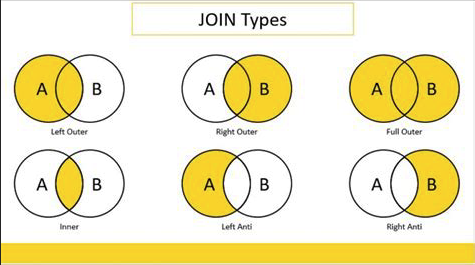

In [10]:
# Inner JOIN.
df.join(deptdf, df["dept"] == deptdf["id"]).show()

+---+----+-----+------+-----+--------------+
| id|name| dept|salary|   id|          name|
+---+----+-----+------+-----+--------------+
|  1| AAA|dept1|  1000|dept1|Department - 1|
|  2| BBB|dept1|  1100|dept1|Department - 1|
|  3| CCC|dept1|  3000|dept1|Department - 1|
|  4| DDD|dept1|  1500|dept1|Department - 1|
|  5| EEE|dept2|  8000|dept2|Department - 2|
|  6| FFF|dept2|  7200|dept2|Department - 2|
|  7| GGG|dept3|  7100|dept3|Department - 3|
|  8| HHH|dept3|  3700|dept3|Department - 3|
|  9| III|dept3|  4500|dept3|Department - 3|
+---+----+-----+------+-----+--------------+



### Left Outer Join

In [11]:
df.join(deptdf, df["dept"] == deptdf["id"], "left_outer").show()

+---+----+-----+------+-----+--------------+
| id|name| dept|salary|   id|          name|
+---+----+-----+------+-----+--------------+
|  1| AAA|dept1|  1000|dept1|Department - 1|
|  2| BBB|dept1|  1100|dept1|Department - 1|
|  3| CCC|dept1|  3000|dept1|Department - 1|
|  4| DDD|dept1|  1500|dept1|Department - 1|
|  5| EEE|dept2|  8000|dept2|Department - 2|
|  6| FFF|dept2|  7200|dept2|Department - 2|
|  7| GGG|dept3|  7100|dept3|Department - 3|
|  8| HHH|dept3|  3700|dept3|Department - 3|
| 10| JJJ|dept5|  3400| NULL|          NULL|
|  9| III|dept3|  4500|dept3|Department - 3|
+---+----+-----+------+-----+--------------+



### Right Outer Join

In [ ]:
df.join(deptdf, df["dept"] == deptdf["id"], "right_outer").show()

### Full Outer Join

In [12]:
df.join(deptdf, df["dept"] == deptdf["id"], "outer").show()

+----+----+-----+------+-----+--------------+
|  id|name| dept|salary|   id|          name|
+----+----+-----+------+-----+--------------+
|   1| AAA|dept1|  1000|dept1|Department - 1|
|   2| BBB|dept1|  1100|dept1|Department - 1|
|   3| CCC|dept1|  3000|dept1|Department - 1|
|   4| DDD|dept1|  1500|dept1|Department - 1|
|   5| EEE|dept2|  8000|dept2|Department - 2|
|   6| FFF|dept2|  7200|dept2|Department - 2|
|   7| GGG|dept3|  7100|dept3|Department - 3|
|   8| HHH|dept3|  3700|dept3|Department - 3|
|   9| III|dept3|  4500|dept3|Department - 3|
|NULL|NULL| NULL|  NULL|dept4|Department - 4|
|  10| JJJ|dept5|  3400| NULL|          NULL|
+----+----+-----+------+-----+--------------+



### Consultas SQL
* Ejecución de consultas tipo SQL.
* También podemos realizar análisis de datos escribiendo consultas similares a SQL. Para realizar consultas similares a SQL, necesitamos registrar el DataFrame como una Vista temporal.

In [13]:
# Register DataFrame as Temporary Table
df.createOrReplaceTempView("temp_table")

# Execute SQL-Like query.
spark.sql("select * from temp_table where id = 1").show()

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
+---+----+-----+------+



In [14]:
spark.sql("select distinct id from temp_table").show(10)

+---+
| id|
+---+
|  1|
|  2|
|  3|
|  5|
|  4|
|  6|
|  7|
|  8|
|  9|
| 10|
+---+



In [15]:
spark.sql("select * from temp_table where salary >= 1500").show(10)

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  3| CCC|dept1|  3000|
|  4| DDD|dept1|  1500|
|  5| EEE|dept2|  8000|
|  6| FFF|dept2|  7200|
|  7| GGG|dept3|  7100|
|  8| HHH|dept3|  3700|
|  9| III|dept3|  4500|
| 10| JJJ|dept5|  3400|
+---+----+-----+------+



### Leyendo la tabla HIVE como DataFrame

In [16]:
# DB_NAME : Name of the the HIVE Database
# TBL_NAME : Name of the HIVE Table


df = spark.table("DB_NAME"."TBL_NAME")

SyntaxError: invalid syntax (3900709972.py, line 5)

24/04/12 03:32:32 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 929194 ms exceeds timeout 120000 ms
24/04/12 03:32:32 WARN SparkContext: Killing executors is not supported by current scheduler.
24/04/12 03:32:38 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at o

### Guardar DataFrame como tabla HIVE

In [ ]:
df.write.saveAsTable("DB_NAME.TBL_NAME")

## También podemos seleccionar el argumento "modo" con overwrite", "append", "error" etc.
df.write.saveAsTable("DB_NAME.TBL_NAME", mode="overwrite")

# De forma predeterminada, la operación guardará el DataFrame como una tabla interna / administrada de HIVE

### Guardar el DataFrame como una tabla externa HIVE

In [ ]:
df.write.saveAsTable("DB_NAME.TBL_NAME", path=<location_of_external_table>)

### Crea un DataFrame a partir de un archivo CSV
* Podemos crear un DataFrame usando un archivo CSV y podemos especificar varias opciones como un separador, encabezado, esquema, inferSchema y varias otras opciones.

In [ ]:
 df = spark.read.csv("path_to_csv_file", sep="|", header=True, inferSchema=True)

### Guardar un DataFrame como un archivo CSV

In [ ]:
df.write.csv("path_to_CSV_File", sep="|", header=True, mode="overwrite")

### Crea un DataFrame a partir de una tabla relacional
* Podemos leer los datos de bases de datos relacionales usando una URL JDBC.

In [ ]:
# url : a JDBC URL of the form jdbc:subprotocol:subname
# TBL_NAME : Name of the relational table.
# USER_NAME : user name to connect to DataBase.
# PASSWORD: password to connect to DataBase.


relational_df = spark.read.format('jdbc')
                        .options(url=url, dbtable= <TBL_NAME>, user= <USER_NAME>, password = <PASSWORD>)
                        .load()

### Guardar el DataFrame como una tabla relacional
* Podemos guardar el DataFrame como una tabla relacional usando una URL JDBC.

In [ ]:
# url : a JDBC URL of the form jdbc:subprotocol:subname
# TBL_NAME : Name of the relational table.
# USER_NAME : user name to connect to DataBase.
# PASSWORD: password to connect to DataBase.


 relational_df.write.format('jdbc')
                    .options(url=url, dbtable= <TBL_NAME>, user= <USER_NAME>, password = <PASSWORD>)
                    .mode('overwrite')
                    .save()